# Sobol indices

In [1]:
import openturns as ot
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 

%matplotlib inline
%load_ext autoreload
%autoreload 2

## Gaussian Framework

In [2]:
from shapley.tests import AdditiveGaussian
dim = 3
beta = None
model = AdditiveGaussian(dim, beta)

In [8]:
from shapley import SobolIndices

ot.RandomGenerator.SetSeed(0)
np.random.seed(0)

n_sample = 300

sobol = SobolIndices(model.input_distribution)

# Generate the samples
sobol.build_sample(model=model, n_sample=n_sample)

In [11]:
%%time
n_boot = 500
estimator = 'sobolmara'

# Indice estimatino
sobol_results = sobol.compute_indices(n_boot=n_boot, estimator=estimator)
sobol_results.true_first_indices = model.first_order_sobol_indices
sobol_results.true_total_indices = model.total_sobol_indices

# Results
first_indices_mc = sobol_results.first_indices
total_indices_mc = sobol_results.total_indices

print("First-order Sobol indices:", first_indices_mc)
print("Total Sobol indices:", total_indices_mc)

First-order Sobol indices: [ 0.36686418  0.33791378  0.26839979]
Total Sobol indices: [ 0.31808573  0.36733984  0.34957463]
Wall time: 28.6 ms


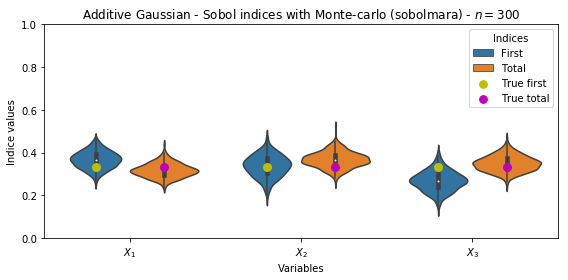

In [12]:
from shapley.plots import plot_sensitivity_results

ylim = [0., 1.]

fig, ax = plt.subplots(figsize=(8, 4))
plot_sensitivity_results(sobol_results, ax=ax)
ax.set_title("%s - Sobol indices with Monte-carlo (%s) - $n=%d$" % (model.name, estimator, n_sample))
ax.set_ylim(ylim)
fig.tight_layout()

In [13]:
from shapley.forest import RandomForestModel
model_budget = 1000
sampling = 'lhs'

meta_model = RandomForestModel(model=model, input_distribution=model.input_distribution)
meta_model.generate_sample(n_sample=model_budget, sampling=sampling)

In [16]:
%%time
from shapley.sobol import sobol_indices
n_realization = 200
meta_model.build(n_realization)
sobol_rf = SobolIndices(model.input_distribution)
sobol_rf.build_sample(meta_model, n_sample=n_sample, n_realization=n_realization)

Wall time: 583 ms


In [17]:
%%time
# Indice estimation
sobol_rf_results = sobol_rf.compute_indices(n_boot=n_boot, estimator=estimator)
sobol_rf_results.true_first_indices = model.first_order_sobol_indices
sobol_rf_results.true_total_indices = model.total_sobol_indices

# Results
first_indices_rf = sobol_rf_results.first_indices
total_indices_rf = sobol_rf_results.total_indices

print("First-order Sobol indices:", first_indices_rf)
print("Total Sobol indices:", total_indices_rf)

First-order Sobol indices: [ 0.33500324  0.23559045  0.34375349]
Total Sobol indices: [ 0.36225791  0.36627735  0.36165415]
Wall time: 2.7 s


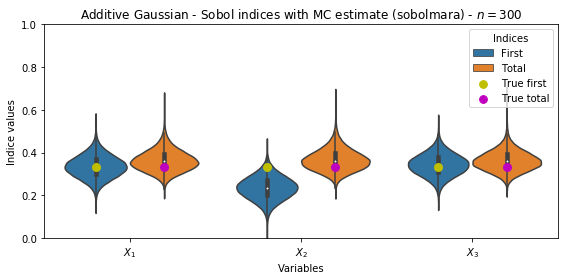

In [18]:
from shapley.plots import plot_sensitivity_results

ylim = [0., 1.]

fig, ax = plt.subplots(figsize=(8, 4))
plot_sensitivity_results(sobol_rf_results, ax=ax)
ax.set_title("%s - Sobol indices with MC estimate (%s) - $n=%d$" % (model.name, estimator, n_sample))
ax.set_ylim(ylim)
fig.tight_layout()

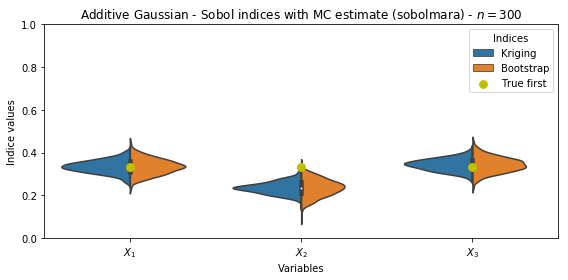

In [19]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_sensitivity_results(sobol_rf_results, ax=ax, indice='first')
ax.set_title("%s - Sobol indices with MC estimate (%s) - $n=%d$" % (model.name, estimator, n_sample))
ax.set_ylim(ylim)
fig.tight_layout()

In [9]:
from shapley.kriging import KrigingModel

ot.RandomGenerator.SetSeed(0)
np.random.seed(0)

model_budget = 10
library = 'OT'
sampling = 'lhs'
kernel = 'matern'
basis = 'quadratic'

# Building the Kriging model
meta_model = KrigingModel(model, model.input_distribution)
meta_model.generate_sample(n_sample=model_budget, sampling=sampling)
meta_model.build(library=library, kernel=kernel, basis_type=basis)

In [10]:
# The score of the meta_model
q2_score_loo = meta_model.compute_score_q2_loo()
print('Q2-score by LOO:', q2_score_loo)

Q2-score by LOO: 0.999580532637


In [ ]:
%time
# Generate the samples
sobol.build_mc_sample(model=meta_model, n_sample=n_sample)

In [ ]:
%%time
# Indice estimation
sobol_gp_results = sobol.compute_indices(n_boot=n_boot, estimator=estimator)
sobol_gp_results.true_first_indices = model.first_order_sobol_indices
sobol_gp_results.true_total_indices = model.total_sobol_indices

# Results
first_indices_gp = sobol_gp_results.first_indices
total_indices_gp = sobol_gp_results.total_indices

print("First-order Sobol indices:", first_indices_gp)
print("Total Sobol indices:", total_indices_gp)

In [ ]:
from shapley.plots import plot_sensitivity_results

ylim = [0., 1.]

fig, ax = plt.subplots(figsize=(8, 4))
plot_sensitivity_results(sobol_gp_results, ax=ax)
ax.set_title("%s - Sobol indices with MC estimate (%s) - $n=%d$" % (model.name, estimator, n_sample))
ax.set_ylim(ylim)
fig.tight_layout()

In [ ]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_sensitivity_results(sobol_gp_results, ax=ax, indice='first')
ax.set_title("%s - Sobol indices with MC estimate (%s) - $n=%d$" % (model.name, estimator, n_sample))
ax.set_ylim(ylim)
fig.tight_layout()

## The model

In [2]:
ishigami = Ishigami()
dim = ishigami.dim
model = ishigami

## Sobol indices with a classical Monte-Carlo sampling

In [40]:
ot.RandomGenerator.SetSeed(0)
np.random.seed(0)
n_sample = 10000

# Evaluate the model
sobol = SobolIndices(model.input_distribution)
sobol.build_mc_sample(model=model, n_sample=n_sample)

In [61]:
%%time
n_boot = 100
estimator = 'sobol'

# Indice estimatino
sobol_results = sobol.compute_indices(n_boot=n_boot, estimator=estimator)
sobol_results.true_first_indices = ishigami.first_order_sobol_indices
sobol_results.true_total_indices = ishigami.total_sobol_indices

# Results
first_indices_mc = sobol_results.first_indices
total_indices_mc = sobol_results.total_indices

print("Sobol indices:", first_indices_mc)
print("Total Sobol indices:", total_indices_mc)

Sobol indices: [ 0.33361853  0.43001347  0.0078783 ]
Total Sobol indices: None
Wall time: 135 ms


Let's see how it looks like in the plot

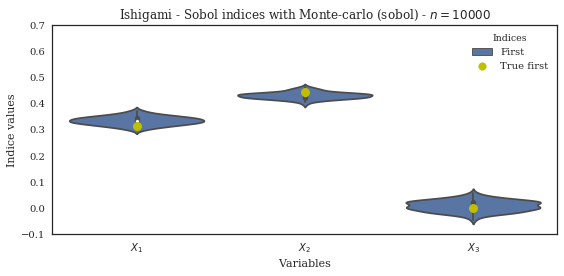

In [62]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_sensitivity_results(sobol_results, ax=ax)
ax.set_title("Ishigami - Sobol indices with Monte-carlo (%s) - $n=%d$" % (estimator, n_sample))
ax.set_ylim(ylim)
fig.tight_layout()
if savefigs:
    fig.savefig('./output/ishigami_sobol_MC.pdf')

## Using a Kriging model to substitute the true model

### Building the model

In [24]:
ot.RandomGenerator.SetSeed(0)
np.random.seed(0)
model_budget = 10
basis = 'quadratic'
kernel = 'matern'
library = 'sklearn'
sobol_kriging = SobolKrigingIndices(model.input_distribution)
meta_model = sobol_kriging.build_meta_model(model, n_sample=model_budget, basis_type=basis, kernel=kernel, library=library)

### The quality of the kriging model

#### With Leave One Out

In [25]:
score_q2_loo = meta_model.compute_score_q2_loo()
print('Leave One Out Q2 score:', score_q2_loo)

Leave One Out Q2 score: 0.0379784979052


#### With cross validation

In [26]:
n_sample_cv = 1000
score_q2_cv = meta_model.compute_score_q2_cv(n_sample_cv, sampling='lhs')
print('Cross Validation Q2 score with %d observations:' % (n_sample_cv), score_q2_cv)

Cross Validation Q2 score with 1000 observations: 0.0


### Estimating the indices

In [27]:
%%time
ot.RandomGenerator.SetSeed(0)
np.random.seed(0)
n_sample = 500
n_realization = 300

# Evaluate the kriging model
sobol_kriging.build_mc_sample(meta_model, n_sample, n_realization)

Wall time: 4.32 s


In [28]:
%%time
n_boot = 100
estimator = 'soboleff2'
sobol_kriging_results = sobol_kriging.compute_indices(n_boot=n_boot, estimator=estimator)
sobol_kriging_results.true_first_indices = ishigami.first_order_sobol_indices
sobol_kriging_results.true_total_indices = ishigami.total_sobol_indices

# Results
first_indices_gp = sobol_kriging_results.first_indices
total_indices_gp = sobol_kriging_results.total_indices

print("Sobol indices:", first_indices_gp)
print("Total Sobol indices:", total_indices_gp)

Sobol indices: [ 0.08156563  0.20573209  0.06220016]
Total Sobol indices: [ 0.61031566  0.73876599  0.54184134]
Wall time: 2.4 s


#### Plot with the first and total indices

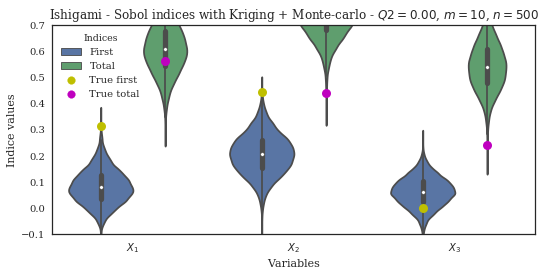

In [29]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_sensitivity_results(sobol_kriging_results, indice='all', ax=ax)
ax.set_ylim(ylim)
ax.set_title("Ishigami - Sobol indices with Kriging + Monte-carlo - $Q2=%.2f$, $m=%d$, $n=%d$" % (score_q2_cv, model_budget, n_sample))
fig.tight_layout()
if savefigs:
    fig.savefig('./output/ishigami_sobol_GP.pdf')

#### Plots of the first indices with the kriging and monte-carlo errors

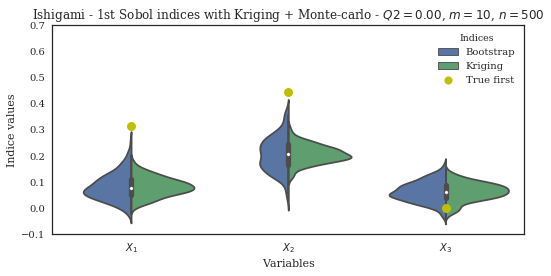

In [30]:
fig, ax = plt.subplots(figsize=(8, 4))
plot_sensitivity_results(sobol_kriging_results, indice='first', ax=ax)
ax.set_ylim(ylim)
ax.set_title("Ishigami - 1st Sobol indices with Kriging + Monte-carlo - $Q2=%.2f$, $m=%d$, $n=%d$" % (score_q2_cv, model_budget, n_sample))
fig.tight_layout()
if savefigs:
    fig.savefig('./output/ishigami_1st_sobol_GP.pdf')

#### Plots of the total indices with the kriging and monte-carlo errors

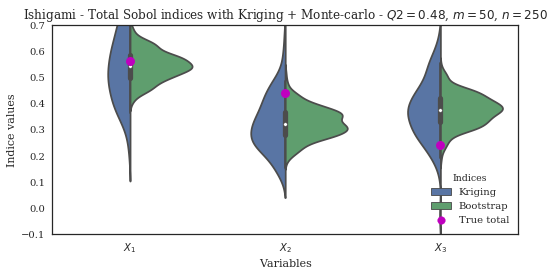

In [24]:
fig, ax = plt.subplots(figsize=(8, 4))
aa = plot_sensitivity_results(sobol_kriging_results, indice='total', ax=ax)
ax.set_ylim(ylim)
ax.set_title("Ishigami - Total Sobol indices with Kriging + Monte-carlo - $Q2=%.2f$, $m=%d$, $n=%d$" % (score_q2_cv, model_budget, n_sample))
fig.tight_layout()
if savefigs:
    fig.savefig('./output/ishigami_total_sobol_GP.pdf')